## Categorical Plots
Categorical plots are used to visualize the categorical data.

In Seaborn, there are various plot functions that we are going to see:

1. Categorical estimate plots
* barplot()
* countplot()
* pointplot()

2.  Categorical distribution plots
* boxplot()
* boxenplot()
* violinplot()

3. Categorical scatter plots
* stripplot()
* swarmplot()

Just like we saw in distribution plots, Seaborn also provides a high level function `catplot()` to plot all these types above. You just have to pass the kind parameter. In order of what how they are listed above, here is the kind parameter: `bar`, `count`, `point`, `box`, `boxen`, `violin`, `strip`, `swarm`.

We will use both the high level function catplot and the specific categorical function along the way.


### Categorical estimate plots
__Barplot() and Countplot()__\
Barplot is used to visualize the aggregated categorical data based on different estimation functions (mean being the default. We can either use `barplot()` or `catplot(...,kind='bar)`.

Countplot is used to visualize the number of observations in each category. It's like histogram for categorical data.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
# Loading the datasets to be used in this lab

warnings.filterwarnings(action='ignore')
titanic = sns.load_dataset('titanic')
fmri = sns.load_dataset('fmri')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

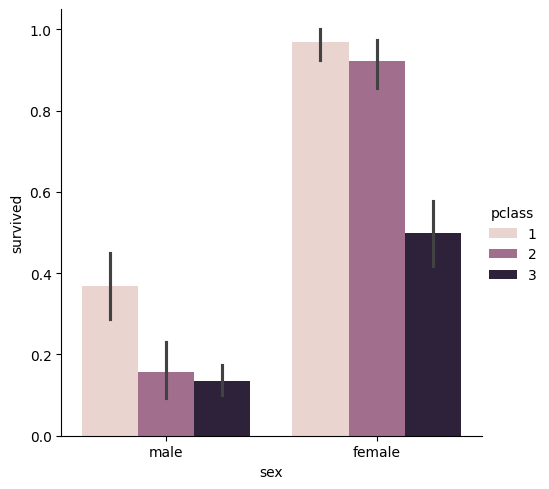

In [2]:
sns.catplot(data=titanic, x='sex', y='survived', hue='pclass', kind='bar')

<Axes: xlabel='sex', ylabel='total_bill'>

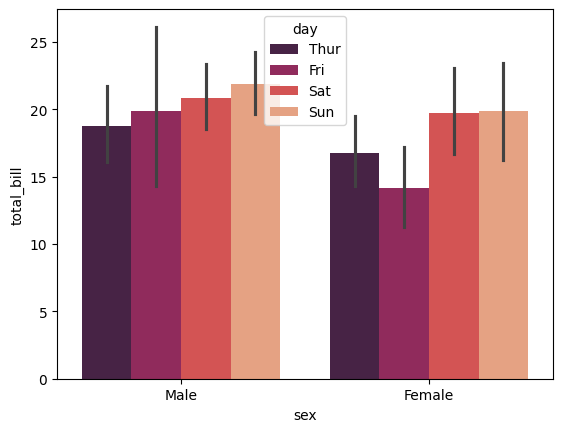

In [3]:
sns.barplot(data=tips, x='sex', y='total_bill', palette='rocket', hue='day')

<Axes: xlabel='day', ylabel='count'>

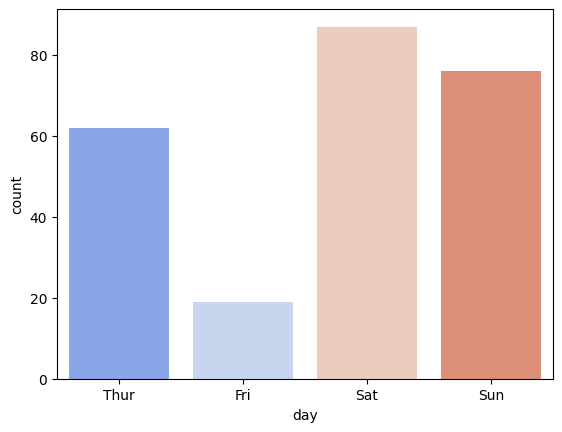

In [4]:
sns.countplot(data=tips, x='day', palette='coolwarm')

__pointplot()__\
Rather than plotting bars, pointplot() plots the point estimation of the categorical data. You may also notice that it connects the points with the categorical variable specified at `hue`.

<Axes: xlabel='sex', ylabel='survived'>

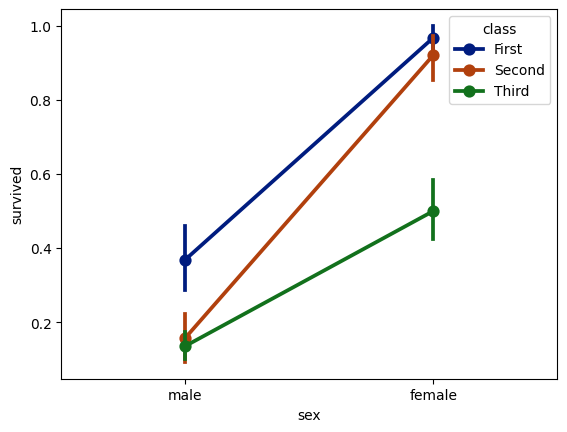

In [5]:
sns.pointplot(data=titanic, x='sex', y='survived', hue='class', palette='dark')

### Categorical distribution plots
__boxplot() and boxenplot(), violinplot()__\
Both Box, boxen, and violin plots are used to plot the distributions of the categorical data.

"A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range."

<Axes: xlabel='day', ylabel='total_bill'>

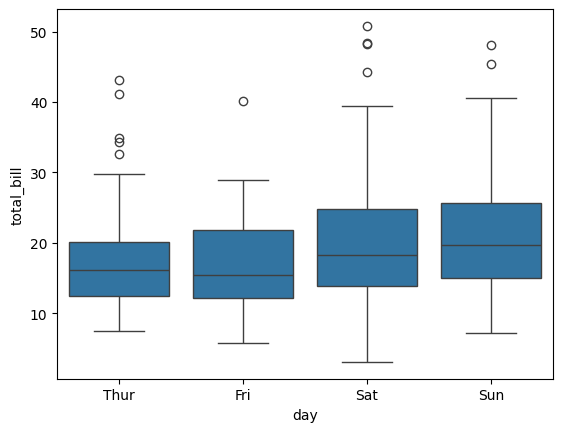

In [6]:
sns.boxplot(data=tips, x='day', y='total_bill')

The box indicate the range in which middle 50% of all values lies. Thus, the lower end of the box is the 1st quartile and the upper end is the 3rd quartile.\
Therefore, 
* 25% of the data are above Q3,
* in the box we find 50% of our data,
* and 25% of the data are below Q1.\
the range between q1 and q3 is called __Interquartile range__.\
*The solid line indicates the __median__.*\
*The dahsed line shows the __mean__.*\
The upper T-shaped whiskers indicate the last point, which is still within 1.5 times the interquartile range.

So, if there is __no outlier__ that is the maximum value.\
Points outside the whiskers are __outliers__





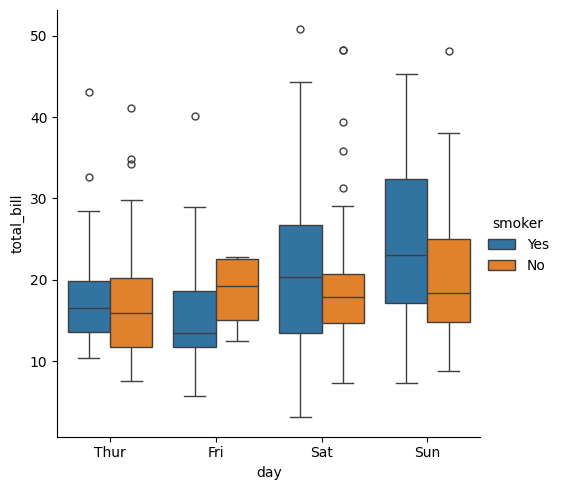

In [7]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='box')

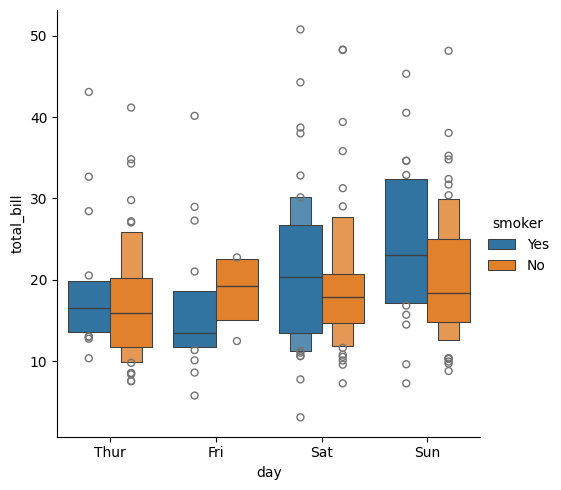

In [8]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='boxen')

Violin plot shows the distributions of the categorical data but features the kernel density of the underlyining estimation.

<Axes: xlabel='day', ylabel='total_bill'>

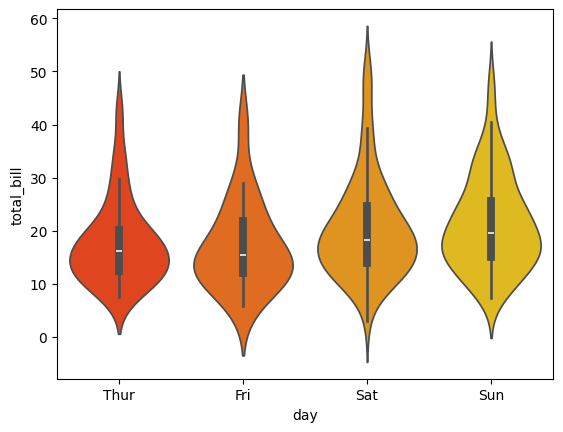

In [9]:
sns.violinplot(data=tips, x='day', y='total_bill', palette='autumn')

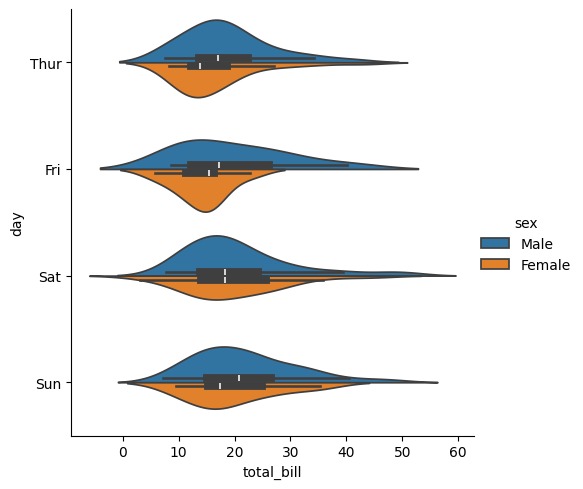

In [10]:
# split parameter save space when hue have two levels

sns.catplot(data=tips, x='total_bill', y='day', 
            hue='sex', kind='violin', split=True)

__When to use each plot__\
_Use `boxplot` when_:
* You want a simple, clean visualization focusing on key summary statistics.
* You need to quickly compare the medians, quartiles, and detect outliers for different categories.
* Your audience may not be familiar with more complex visualizations like KDE plots.\

_Use `catplot` when_:
* You want to create a plot that is divided into multiple subplots (facets) based on additional categorical * variables.
* You need a unified function to create various types of categorical plots (e.g., box plot, violin plot, bar plot, or swarm plot) just by changing the kind parameter.
* You are performing multi-dimensional categorical analysis where you want to show how a relationship changes based on another categorical variable.\

_Use `violinplot` when_:
* You need a more detailed view of the distribution's shape, which a simple box plot can obscure.
* You want to see if your data has multiple peaks (multimodal), which a box plot would completely hide.
* The raw density of data points is more important than just the quartiles.

### Categorical scatter plots
`stripplot()` and `swarmplot()`\
These types of plots make it easy to show the categorical data with scatter plots.

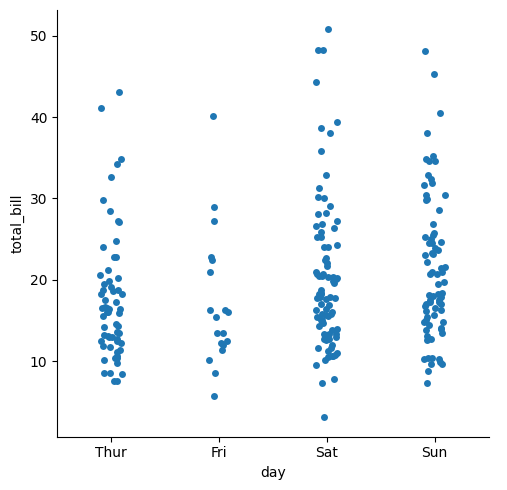

In [11]:
# strip is the default kind paremeter when using catplot()

sns.catplot(data=tips, x='day', y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

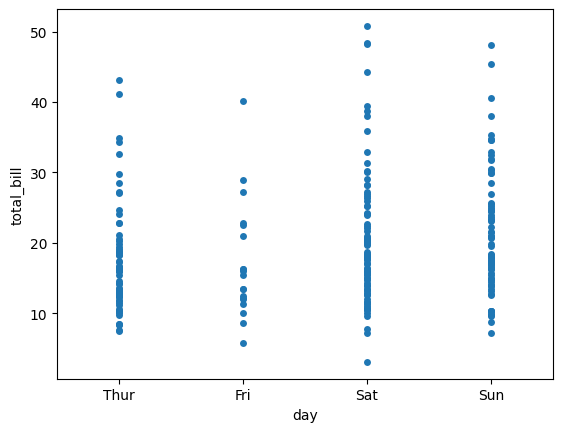

In [12]:
sns.stripplot(data=tips, x='day', y='total_bill', jitter=False)

The crucial parameter here is `jitter=False`, which prevents any random displacement of the data points along the x-axis.

<Axes: xlabel='day', ylabel='total_bill'>

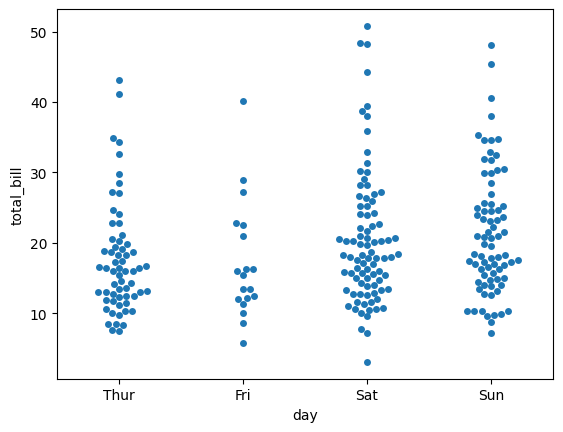

In [13]:
sns.swarmplot(data=tips, x='day', y='total_bill')

A __swarm plot__ is a categorical scatterplot that shows the individual data points for each category in a way that avoids overlap. Unlike a simple scatterplot or strip plot, a swarm plot strategically positions the points along the categorical axis so that they do not obscure one another.

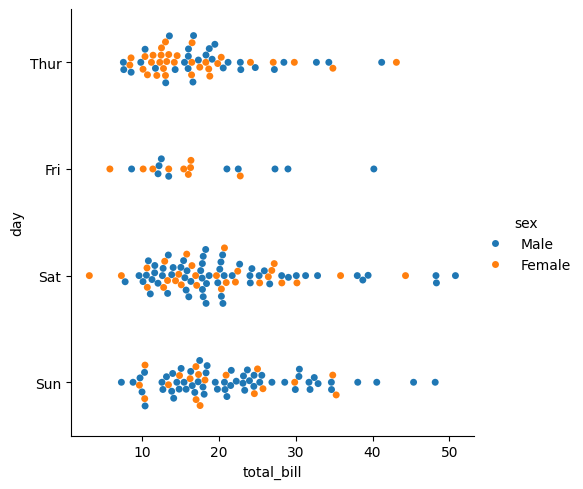

In [14]:
sns.catplot(data=tips, x='total_bill', y='day', hue='sex', kind='swarm')

_The plot will show the following insights for each day of the week:_
* __Individual data points__: Every single total_bill value from the dataset is represented as a single point.
* __Data density__: The "width" of the swarm indicates the density of the data at a given value. Where the swarm is wide, there are many data points clustered together. Where it is narrow, there are fewer data points.
* __Distribution shape__: You can visually assess the shape of the distribution, see where the data is clustered, and identify potential outliers.

<u>_Swarm plots are most useful when we want to_:</u>
* See every individual data point to understand the exact distribution, not just a summary.
* Avoid the information loss of overlapping points that can occur with strip plots.
* Complement a box or violin plot by adding the granular detail of individual points.\
They are not ideal for very large datasets, as the computational time needed to arrange the points can be high, and the visualization can become too dense and cluttered.

Plotting Multiple Categorical plots
Using Facetgrid (Multi-plot grid for plotting conditional relationships), we can plot multiple plots with catplot(....)

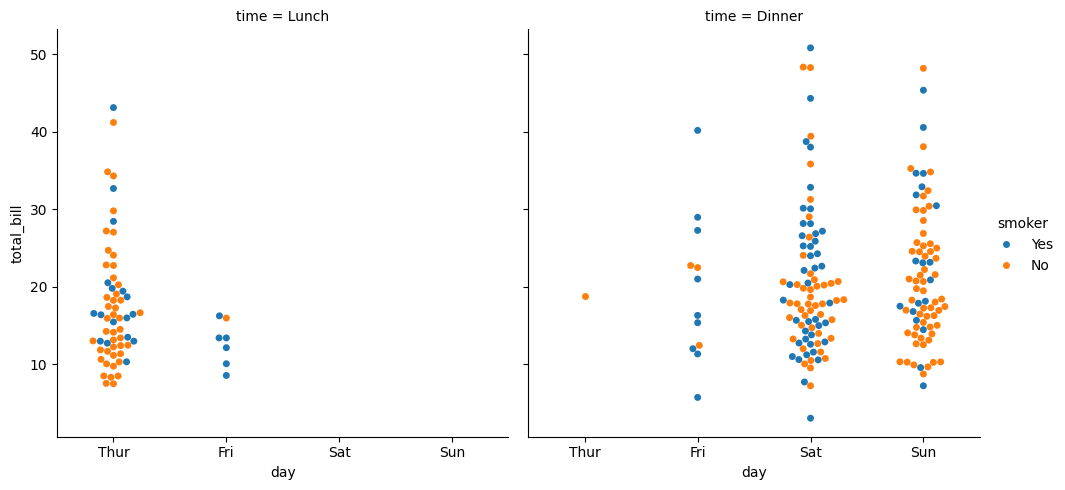

In [15]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker',
            col='time', kind='swarm')

End of Categorical plots

### Regression Plots
Seaborn takes data visualizations to other extents: Not only you can plot features, but you can also plot the linear relationship between two variables (linear model).

Even if `regplot()` can be used for such goal, we will use `lmplot()`.

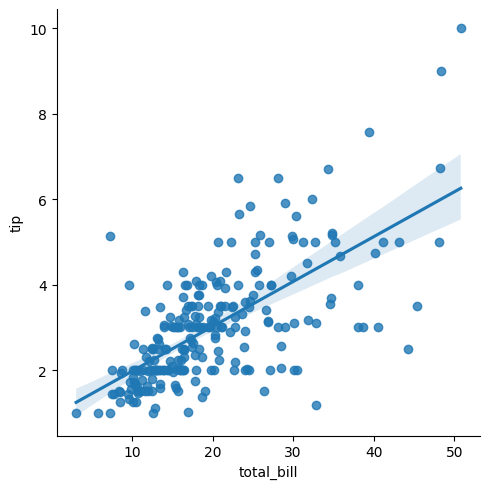

In [16]:
sns.lmplot(data=tips, x='total_bill', y='tip')

__`lmplot`__ is a _figure-level function_ in Seaborn, meaning it manages the entire figure and can easily create multiple subplots based on categorical variables. It's a combination of `regplot()` (which fits the _regression model_) and `FacetGrid` (which organizes the plotting).\
The resulting plot includes two key elements:
1. __A scatter plot__: This shows every data point from the tips dataset, with the total_bill on the x-axis and the tip on the y-axis.
2. __A linear regression line__: This is the "line of best fit" that represents the linear relationship between the two variables. The line is calculated to minimize the distance to the data points.
3. __A confidence interval__: The shaded area around the regression line is a 95% confidence interval. This shows the uncertainty in the estimate of the regression line, which is generated by a process called bootstrapping.

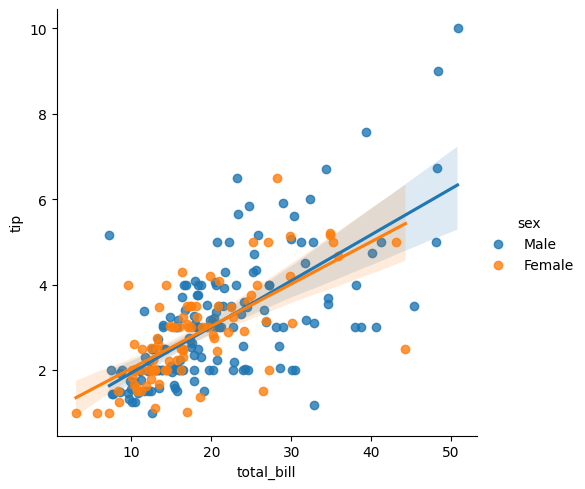

In [17]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex')

__How to interpret the plot__
The plot helps you understand the relationship between the total bill and the tip amount.
* __Trend__: The slope of the regression line indicates the direction of the relationship. A positive slope (as you'd expect) means that as the total bill increases, the tip amount tends to increase as well.
* __Correlation__: The tightness of the data points around the regression line suggests the strength of the correlation. If the points are tightly clustered around the line, there is a strong linear relationship. If they are more scattered, the relationship is weaker.
* __Uncertainty__: The width of the shaded confidence interval shows how certain we are about the estimated relationship. A narrower band means a more precise estimate.
* __Outliers__: Any data points that fall far away from the regression line can be easily identified as outliers.

In [18]:
tips['big_tip'] = (tips.tip / tips.total_bill) >.15
tips.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


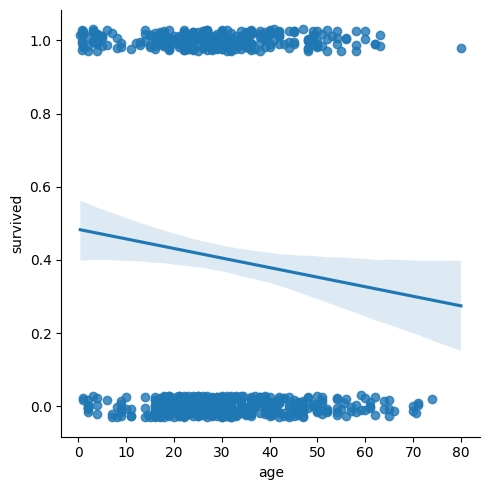

In [21]:
sns.lmplot(x='age', y='survived', data=titanic, y_jitter=0.03)

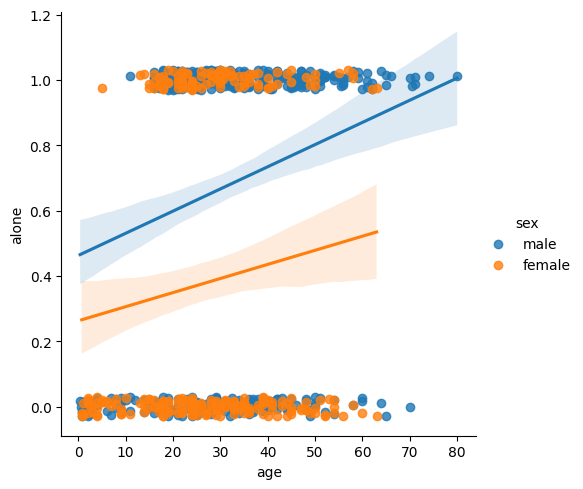

In [23]:
sns.lmplot(x='age', y='alone', data=titanic, y_jitter=0.03, hue='sex')

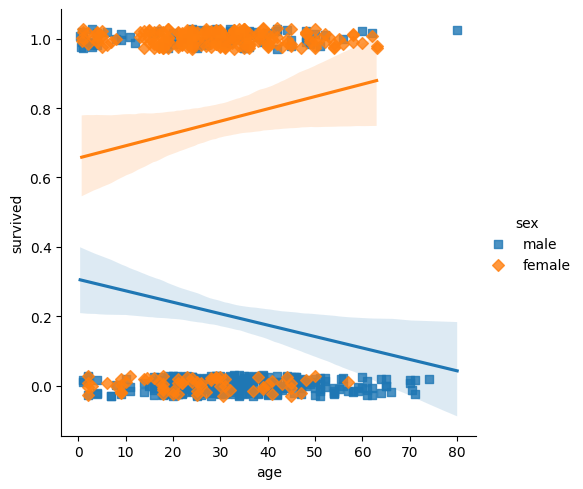

In [ ]:
sns.lmplot(data=titanic,x='age', y='survived', hue='sex', 
           y_jitter=0.03, markers=['s','D'])

__Note :__ `markers=['s','D']`: Specifies the marker style for the data points. The first marker ('s' for _square_) will be used for the first category in hue, and the second marker ('D' for _diamond_) for the second.

### __Multiple Plots__
Like we did before, we can make multiple plots by providing another variable to col and row.

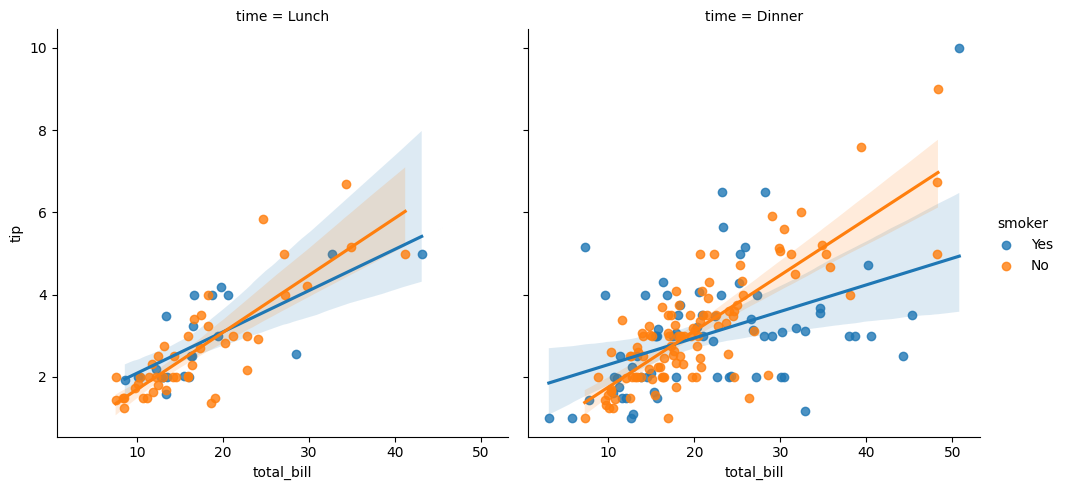

In [27]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time')

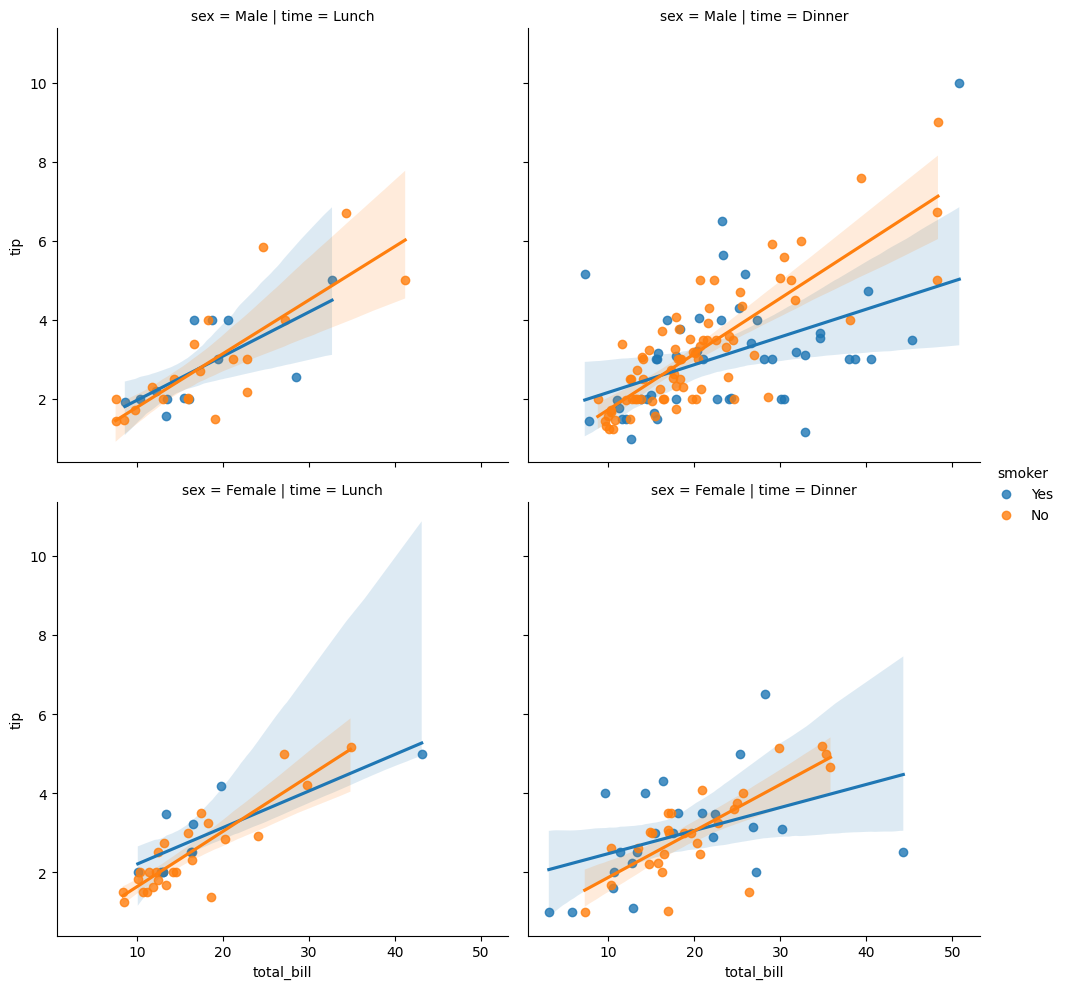

In [28]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time', row='sex')

One last thing about regression plot in Seaborn: We can also use `jointplot()` and `pairplot()` where we use reg in parameter kind.

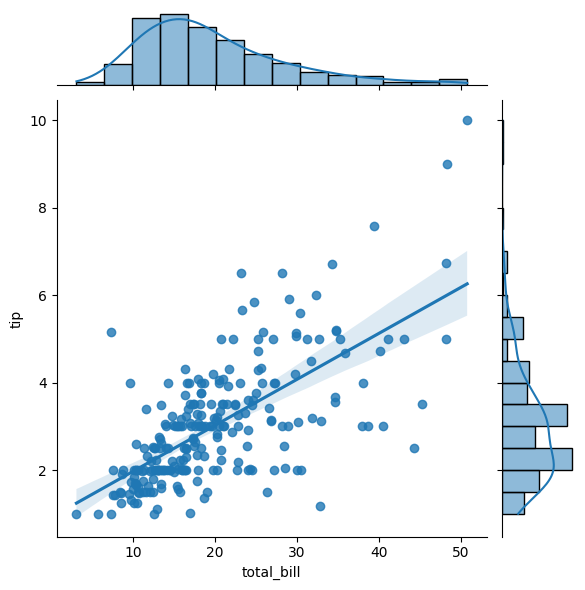

In [29]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

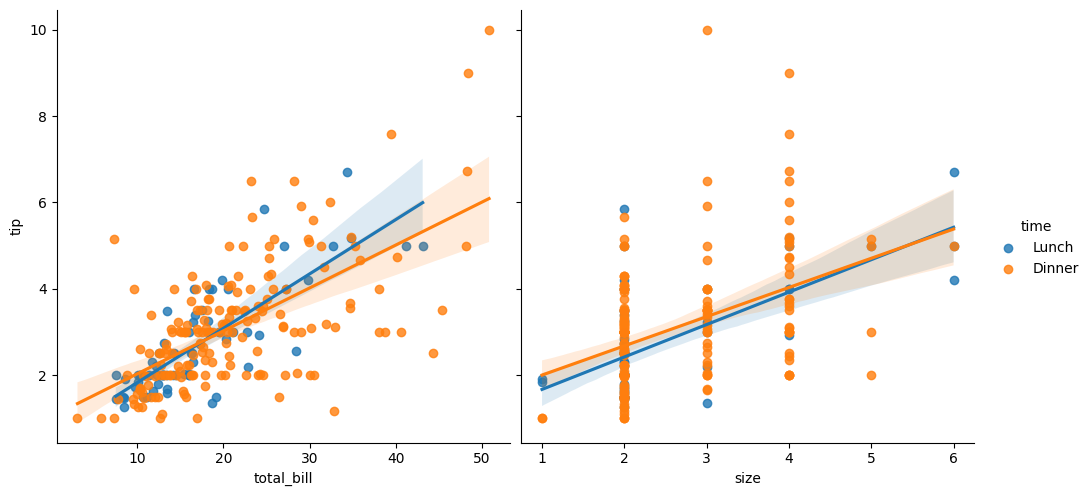

In [30]:
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=['tip'],
             hue='time', kind='reg', height=5)

### Multiplots
Multiple plots functions are used to visualize multiple features on multiple axes.

* Facet Grid
* PairGrid
* Pair Plot
We have already plotted multiple features in previous sections but this section is going to be these grid plots.


__`FacetGrid()`__
`FacetGrid()` is used to create multiple grid plots. It allows us to plot the variables on `row` and `column` axes, and we can also use `hue` parameter to make the visual more clear based off a given feature.

What's interesting about FacetGrid is that you can choose whether you plot on `row` axe, `column` axe or both.

`sns.FaceGrid()` only create grids. In order to add visualizations, we will need to map it to a given plot type (`scatter`, `histogram`, `bar`....).



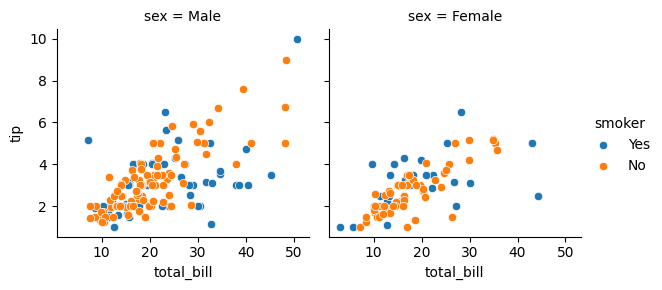

In [31]:
plot = sns.FacetGrid(tips, col='sex', hue='smoker')
plot.map(sns.scatterplot,'total_bill', 'tip')
plot.add_legend()

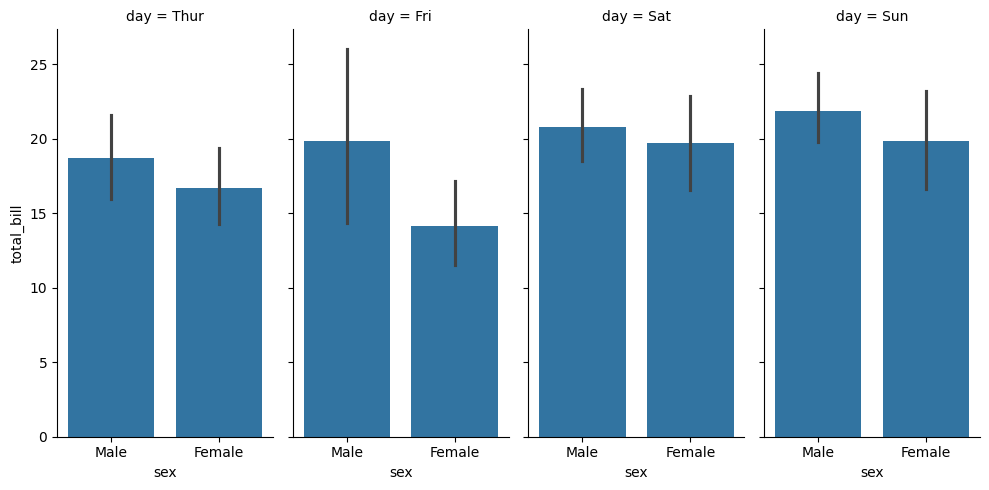

In [32]:
plot = sns.FacetGrid(tips, col='day', height=5, aspect=.5)
plot.map(sns.barplot, 'sex', 'total_bill');

* `height=5`: Sets the height of each individual subplot (facet) in inches.
* `aspect=.5`: Sets the aspect ratio of each subplot. An aspect ratio of 0.5 means the width of each subplot will be half its height (5 * 0.5 = 2.5 inches). This makes the individual plots tall and narrow, which is suitable for bar plots with few categories

Each bar chart will show two bars: one for Male and one for Female. The height of each bar will represent the average total_bill paid by that gender on that specific day. This visualization allows for a direct visual comparison of the average total_bill between genders

### PairGrid()
We can use pair grid to get the higher level overview of the dataset. It will plot the pairwise relationship in the dataset.

As you are going to see, it is much easier to use than FacetGrid.

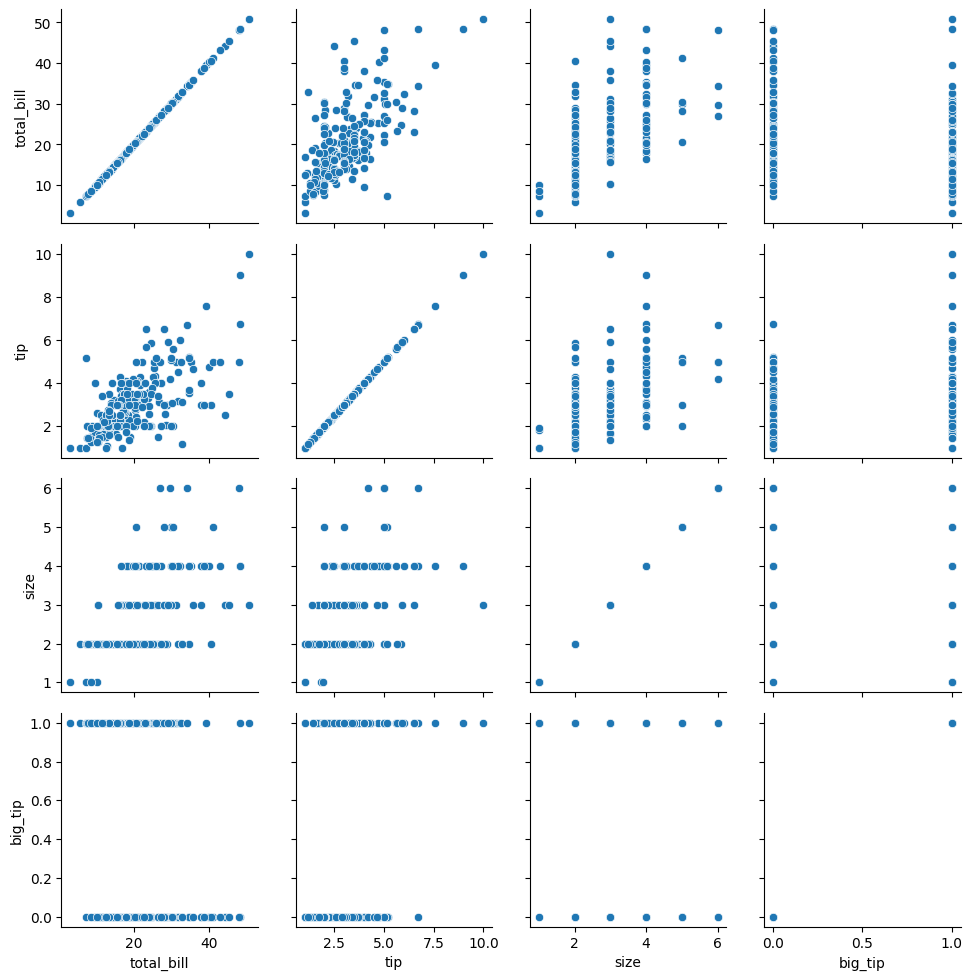

In [33]:
plot = sns.PairGrid(tips)
plot.map(sns.scatterplot)

It is also possible to be selective on the plot type you want at the diagonals.

* __Diagonal Subplots:__ These histograms show the individual distribution of total_bill, tip, and size. By comparing the stacked or overlapping colored bars, you can see how the distribution of these variables differs between males and females.
* __Off-Diagonal Subplots:__ These scatter plots show the correlation and relationship between every pair of numerical variables (e.g., total_bill vs. tip, total_bill vs. size). The colored data points allow you to investigate if the relationship between these variables is different for males versus females.

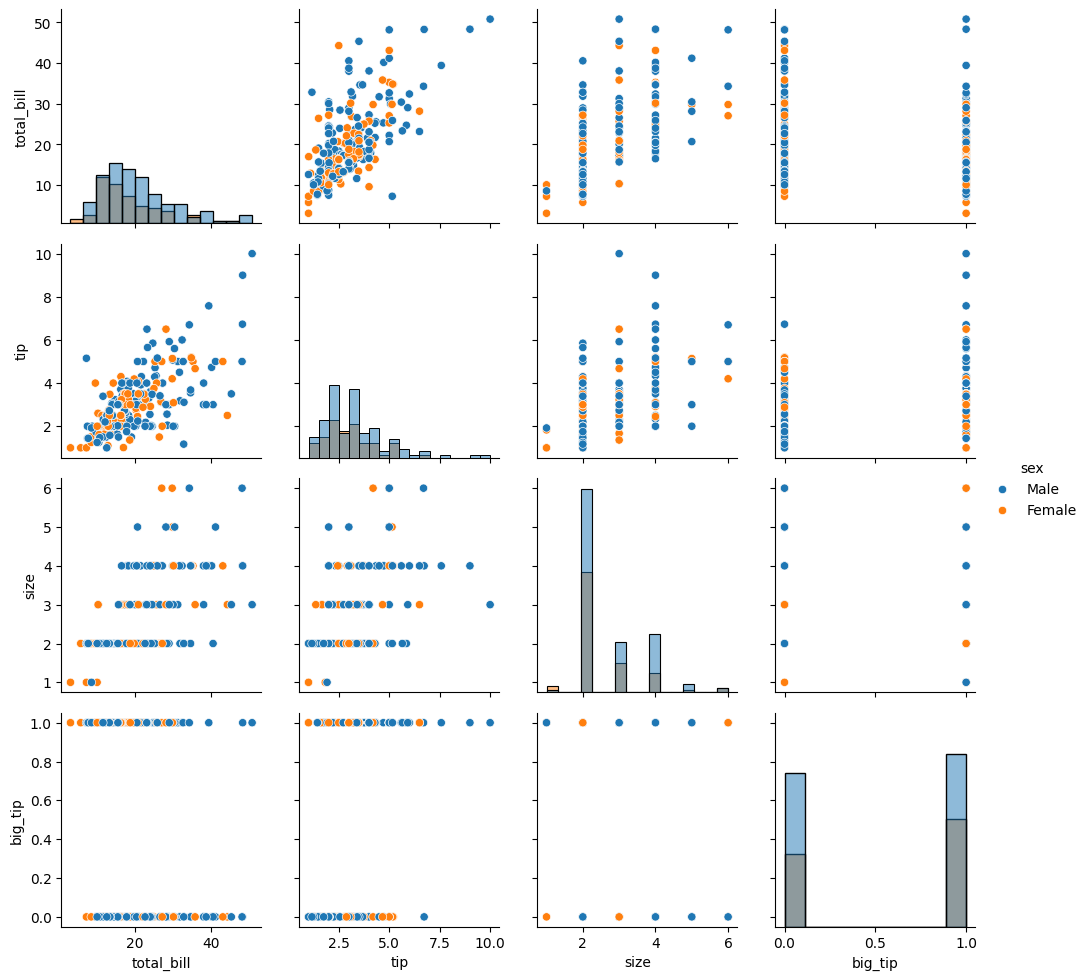

In [34]:
plot = sns.PairGrid(tips, hue='sex')
plot.map_diag(sns.histplot)
plot.map_offdiag(sns.scatterplot)
plot.add_legend()

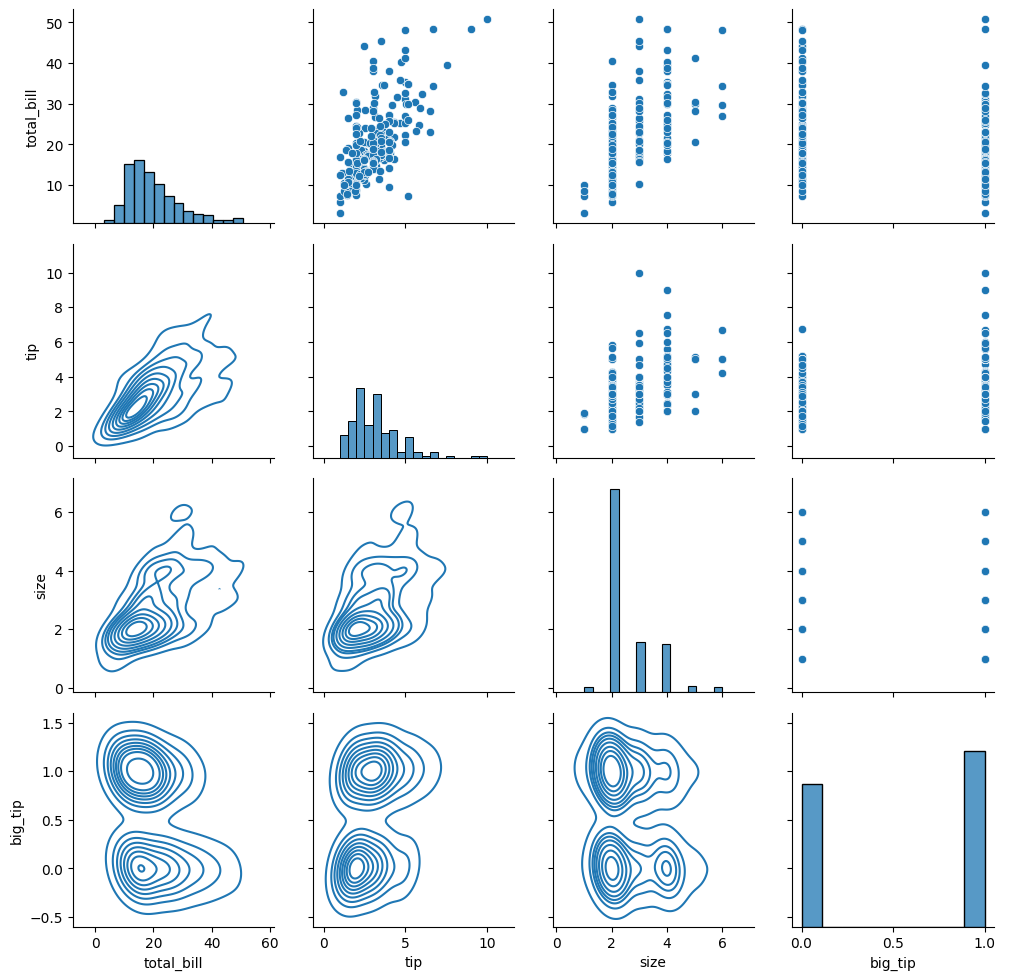

In [35]:
plot = sns.PairGrid(tips)
plot.map_diag(sns.histplot)
plot.map_upper(sns.scatterplot)
plot.map_lower(sns.kdeplot)
plot.add_legend()

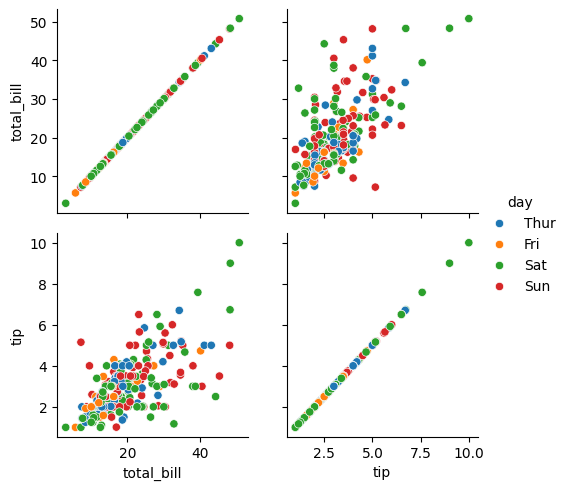

In [36]:
plot = sns.PairGrid(tips, vars=['total_bill', 'tip'], hue='day')
plot.map(sns.scatterplot)
plot.add_legend()

### Pairplot()
Pairplot is a simple, flexible and quick way to visualize the entire dataset. This can allows you to quickly understand the relationships between different features.

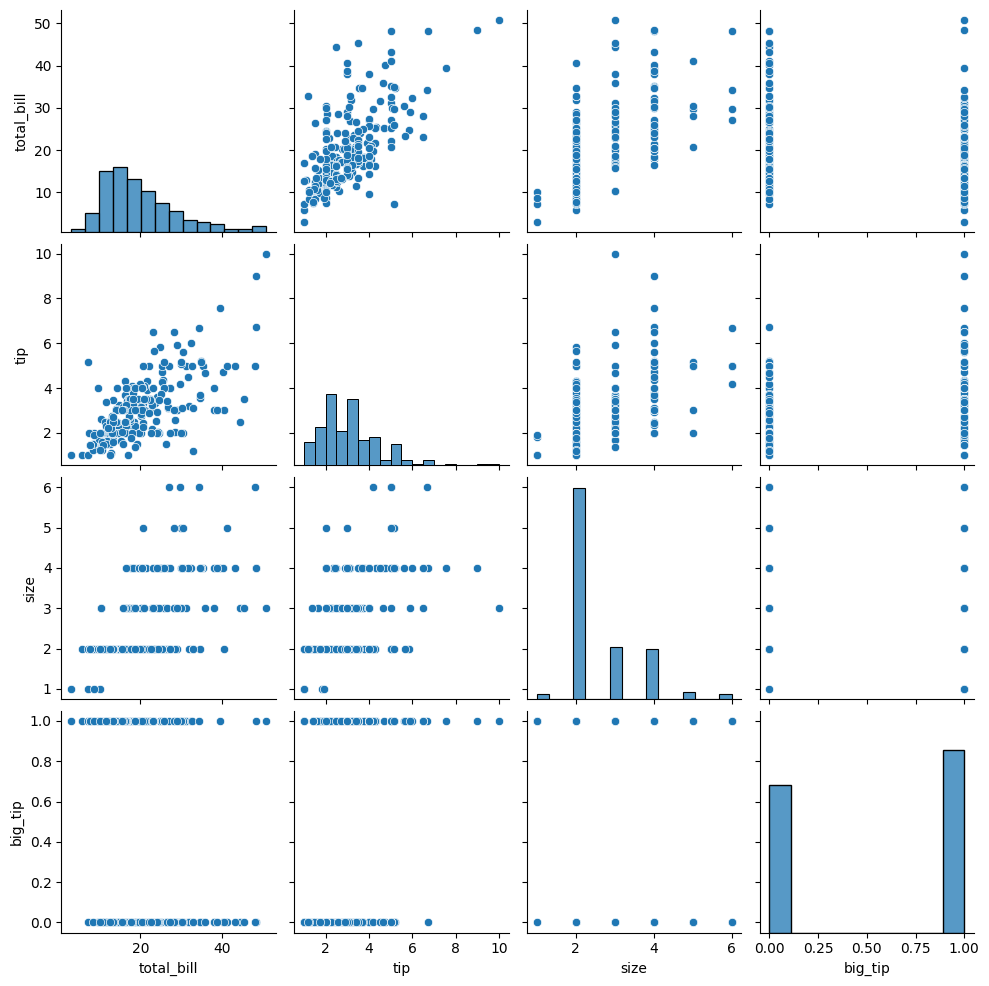

In [37]:
sns.pairplot(tips)

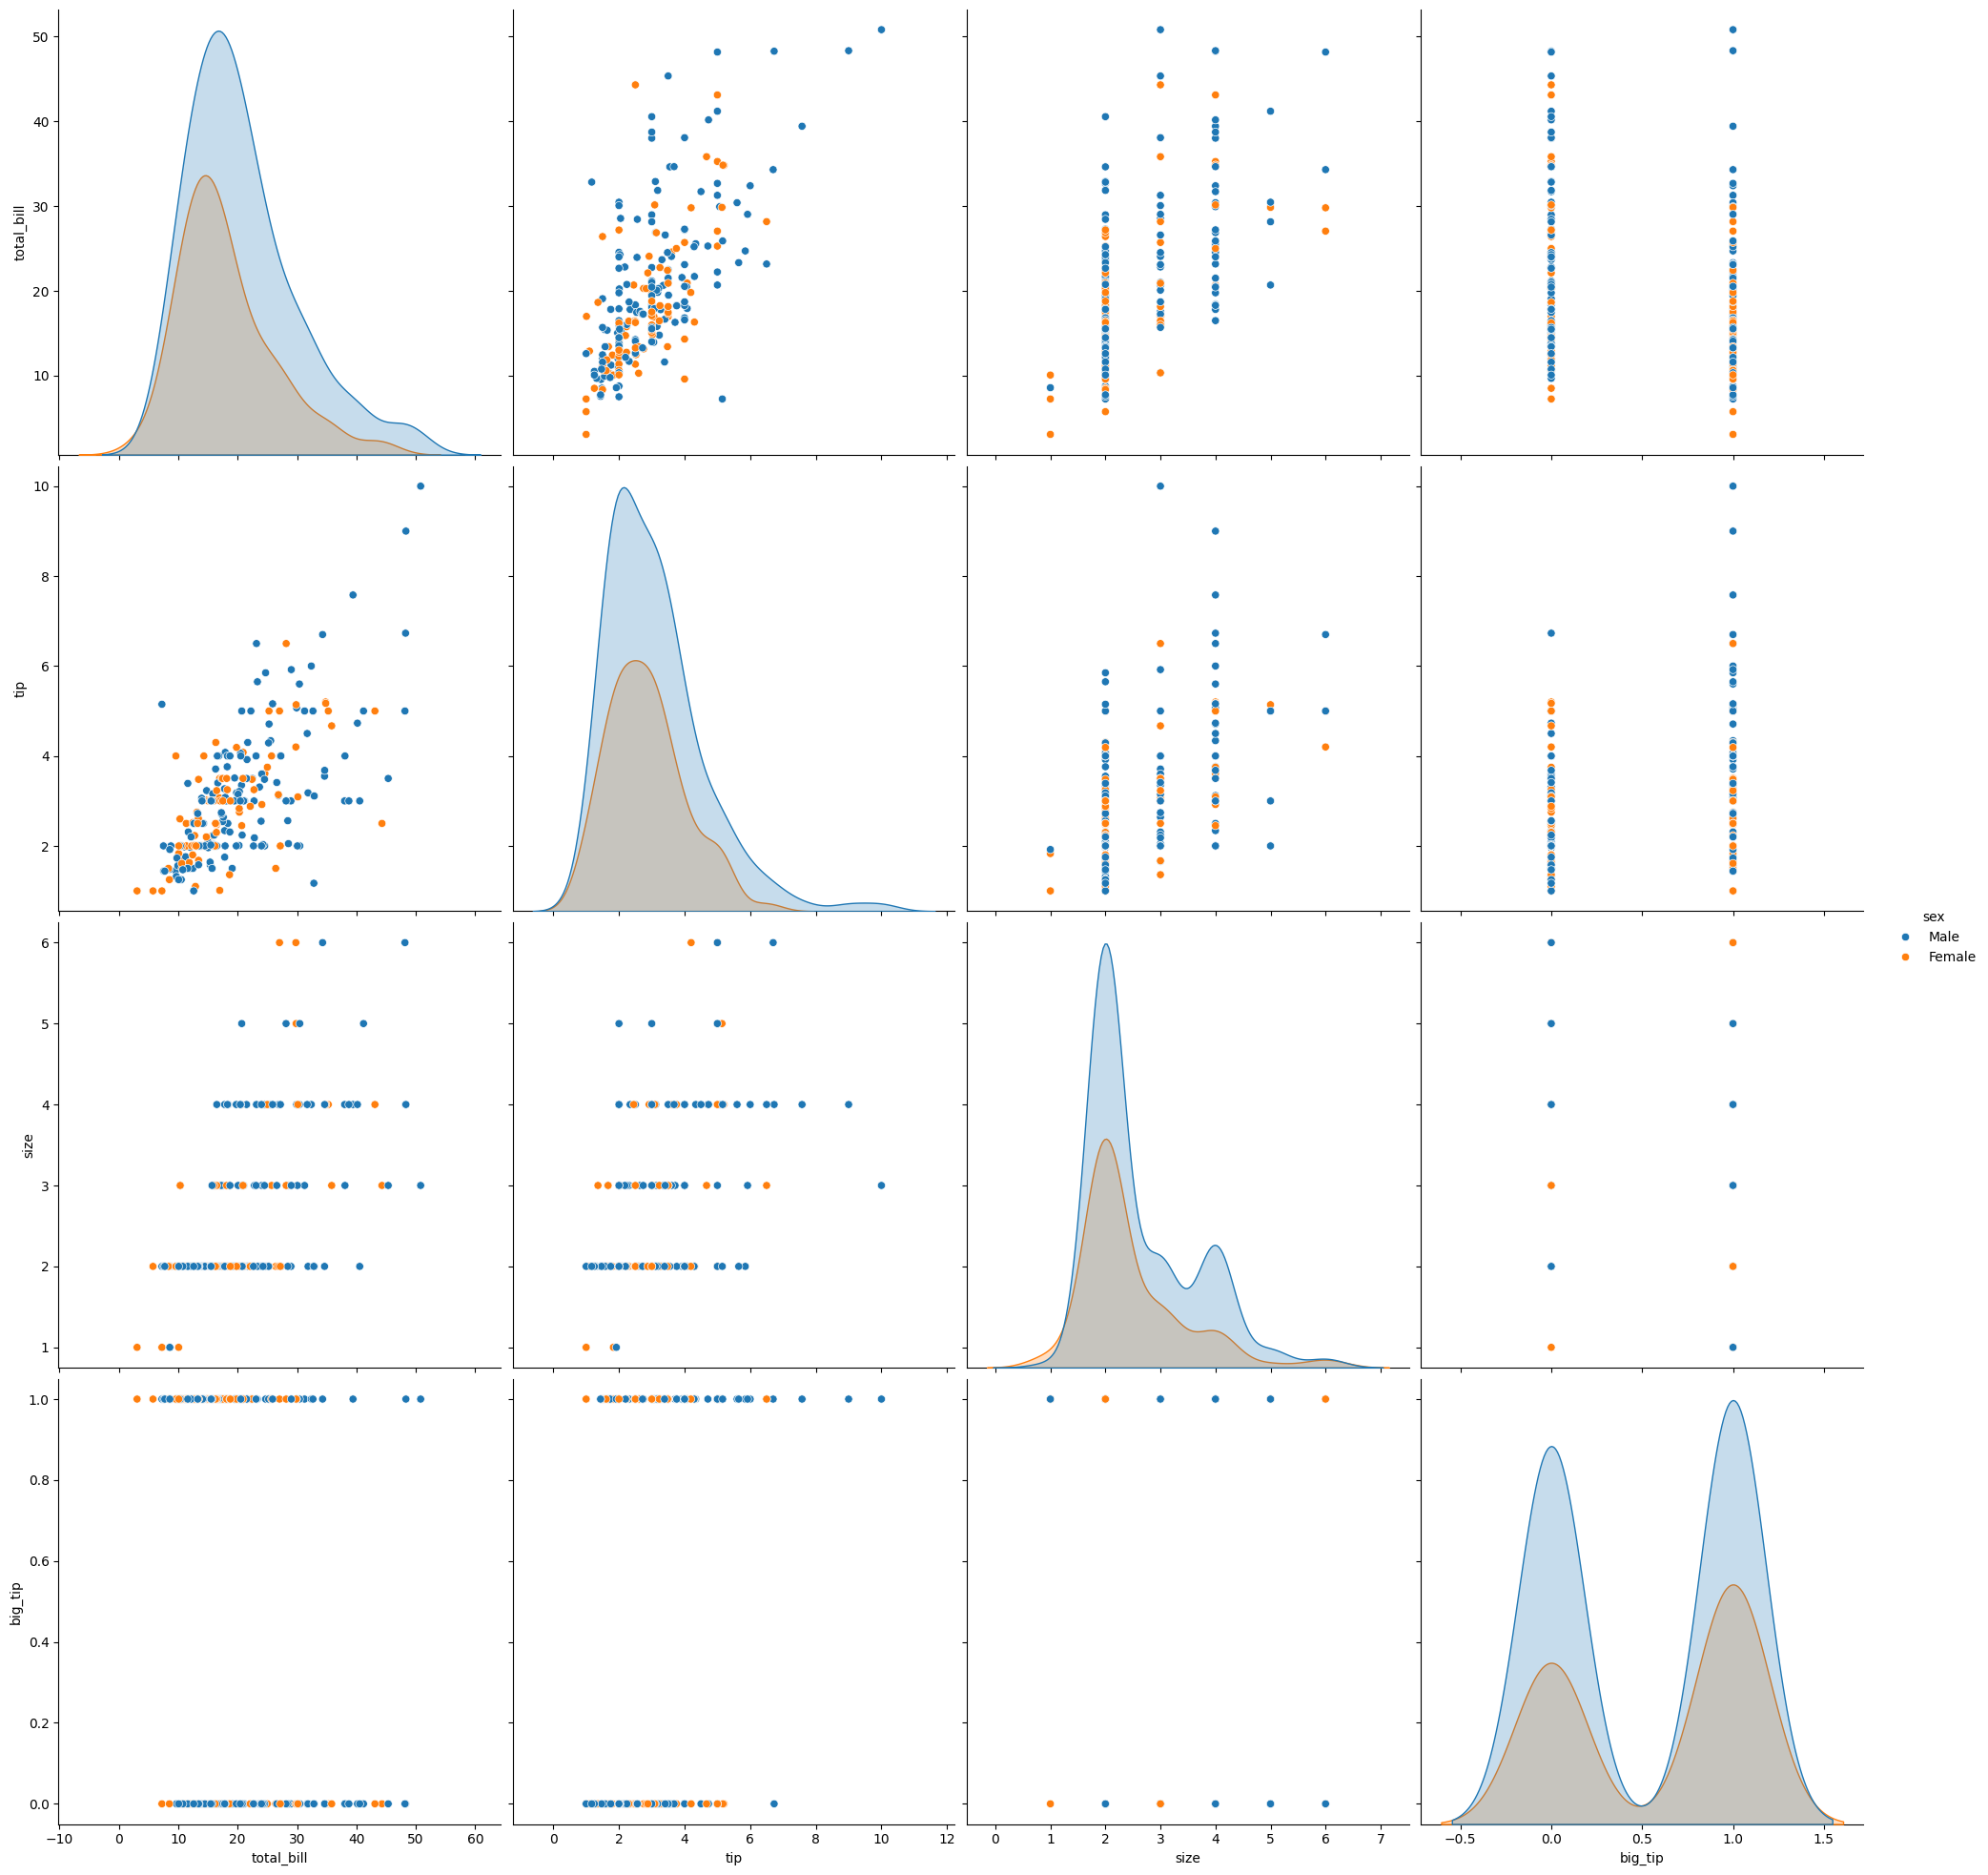

In [38]:
sns.pairplot(tips, hue='sex', height=5);

### __Matrix Plots: Heat Maps and Cluster Maps__
In data analysis, sometime it is handy to visualize the data as color encoded matrices and can be used to find the clusters within the data.


__Heat Maps__
`heatmap()` will color the matrix.

Let's first see it for a numpy array and we will apply it to a real world dataset.

<Axes: >

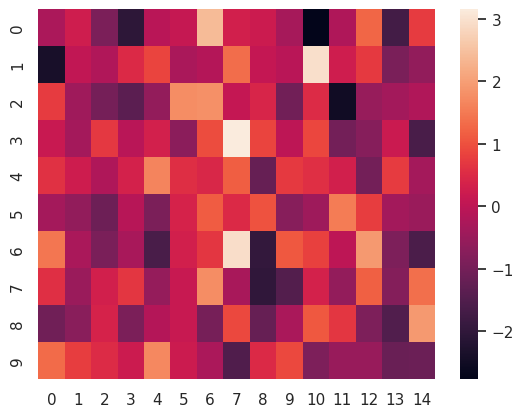

In [39]:
sns.set_theme()
data = np.random.randn(10,15)
sns.heatmap(data)

In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
# Finding the correlation of features in titanic dataset

correlation = titanic.corr(numeric_only=True)
correlation

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<Axes: >

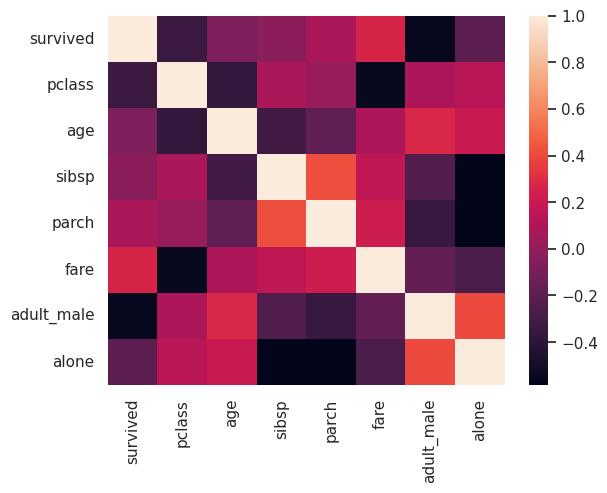

In [45]:
sns.heatmap(correlation)

If we want to add the values in addition to color, we can set the parameter `annot` to `True`.

<Axes: >

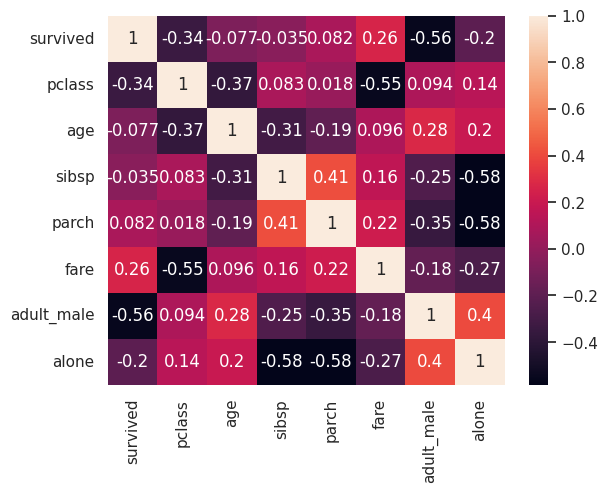

In [46]:
sns.heatmap(correlation, annot=True)

### __Cluster Maps__
clustermap will plot the clustered heatmap.

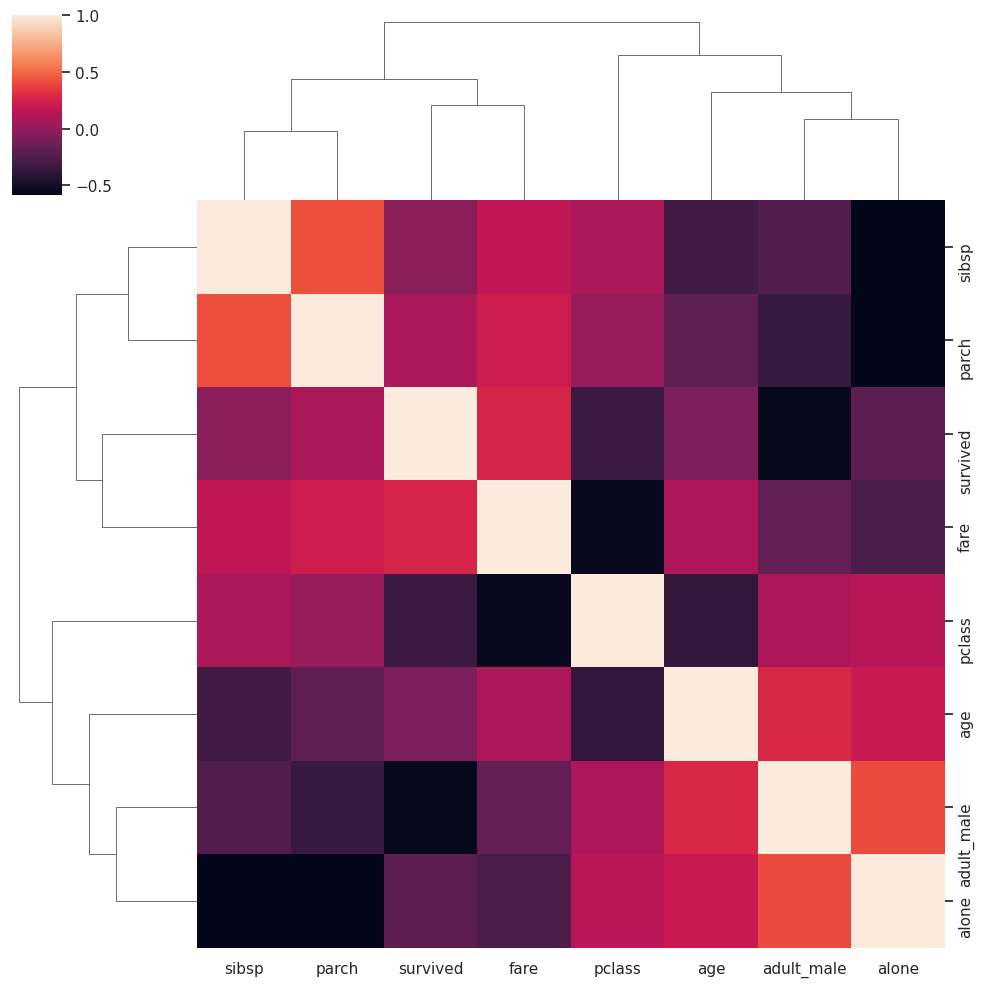

In [47]:
sns.clustermap(correlation)

So far, we saw how flexible Seaborn is in visualizing data with different kinds of plots.

By default, the Seaborn plots are clear and good looking. But there are times we would to need more attractive visualizations and that is what is coming up.

### __Styles, Themes and Colors__
Seaborn allows to customize the visualizations depending on our needs. We may want to have control on the plot styles, colors. Let's see how that works.

__Styles and Themes__\
There are five styles in Seaborn: `darkgrid(default)`, `whitegrid`, `dark`, `white`, and `ticks`.

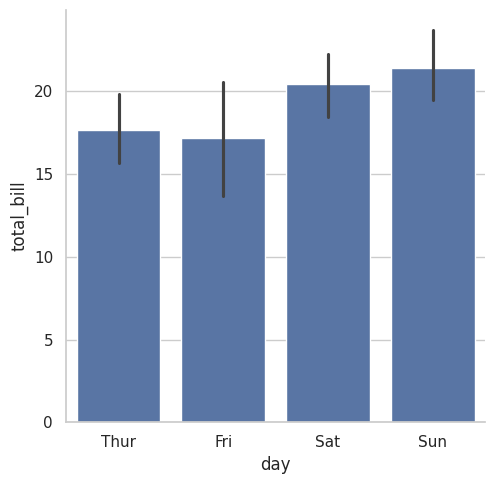

In [48]:
sns.set_style('whitegrid')
sns.catplot(data=tips, x='day', y='total_bill', kind='bar')

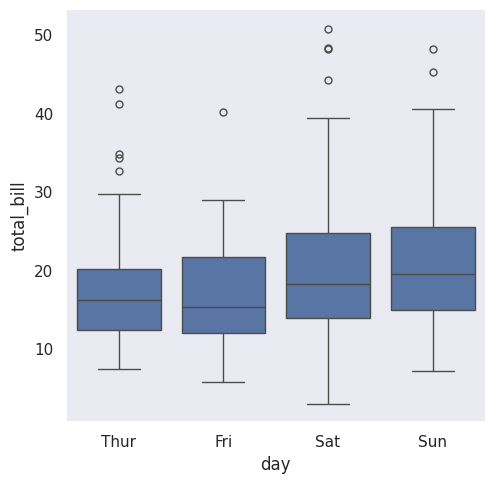

In [49]:
sns.set_style('dark')
sns.catplot(data=tips, x='day', y='total_bill', kind='box')

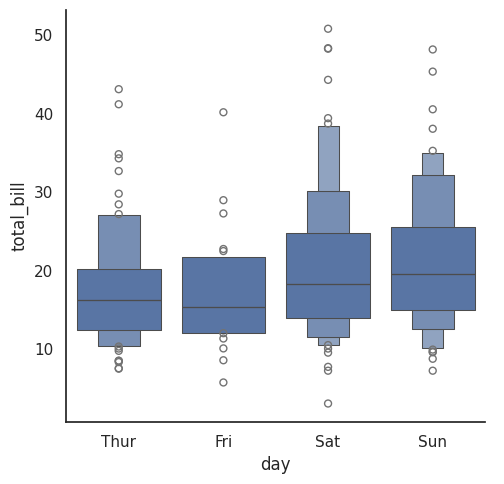

In [50]:
sns.set_style('white')
sns.catplot(data=tips, x='day', y='total_bill', kind='boxen')

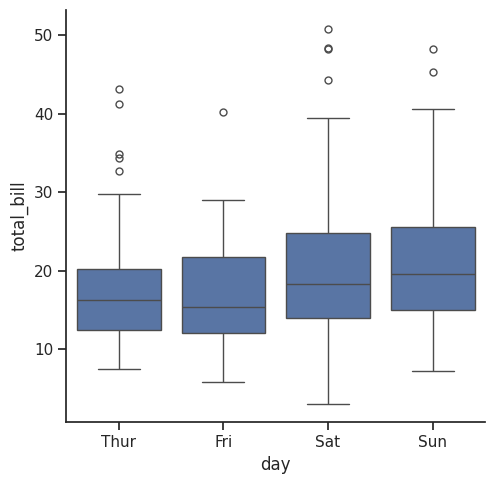

In [51]:
sns.set_style('ticks')
sns.catplot(data=tips, x='day', y='total_bill', kind='box')

__Removing the Axes Spines__\
We can also use `despine()` to remove the top and right axes spines.

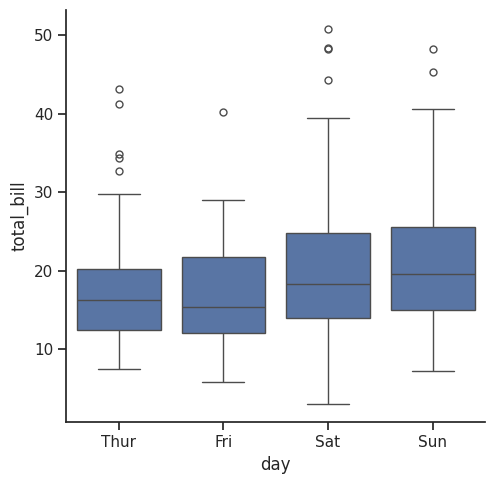

In [57]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box')
sns.despine() # this is going to remove the unnecessary axis i.e top and right axis from plt

We can also move the spines away from the data by setting the offset distance or points that spines should move away from the axes.

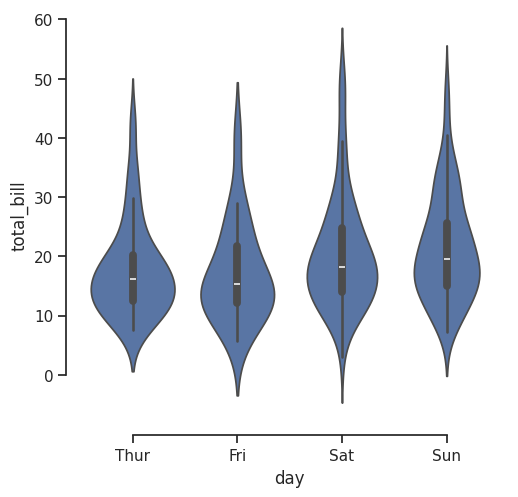

In [63]:
sns.catplot(data=tips, x='day', y='total_bill', kind='violin')
sns.despine(offset=10, trim=True)

* `offset=10`: Moves the remaining spines (left and bottom) outwards by 10 points, creating a small gap between the data and the axes.
* `trim=True`: Limits the length of the remaining spines so they end precisely at the last major tick mark, preventing them from extending to the edge of the plot

### Size and Aspect
We can use Matplotlib figsize function to change the size of Seaborn plots

<Axes: xlabel='total_bill', ylabel='Count'>

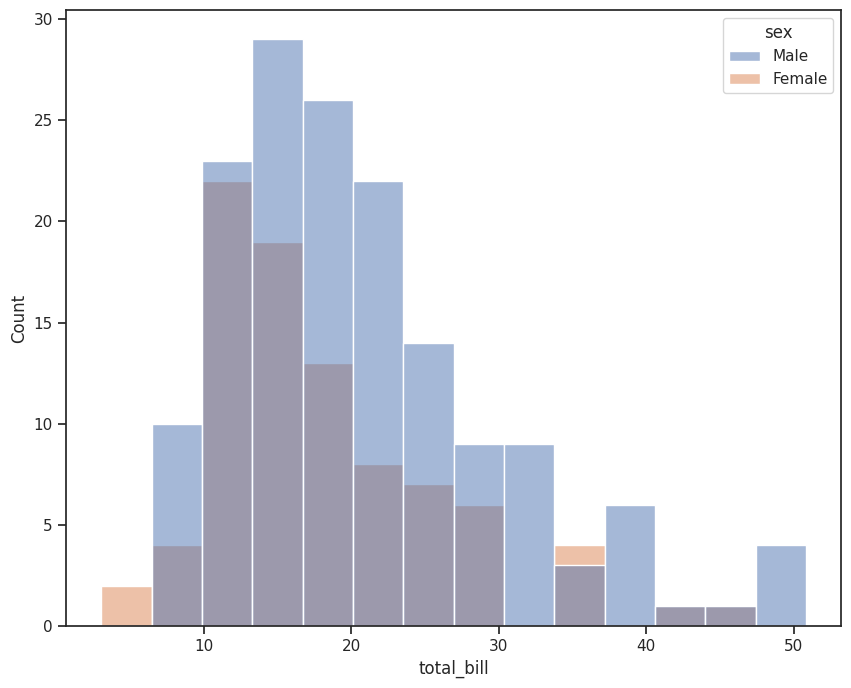

In [64]:
plt.figure(figsize=(10,8))

sns.histplot(data=tips, x='total_bill', hue='sex')

You can also set the size of the plot by using parameters size and aspect but they do not work in all plots.

__Scaling plot elements with the context__\
Context is used to control the scale of the elements of the plot. This can be really helpful depending on where you want to use the visualizations.

We use `sns.set_context()` to achieve that. There are four contexts: `paper`, `notebook(default)`, `talk`, and `poster`.

But we also have to reset the style first.

In [65]:
sns.set_theme()

<Axes: xlabel='tip', ylabel='Density'>

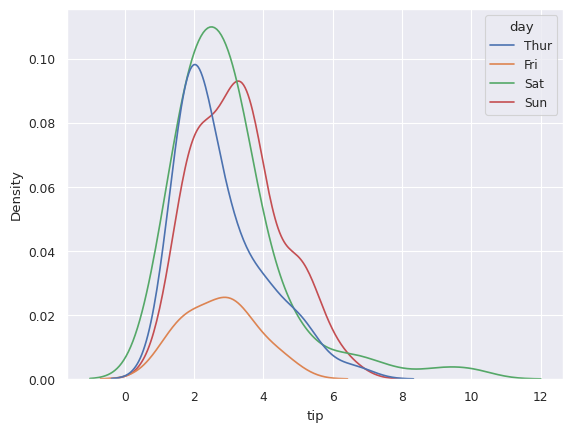

In [66]:
sns.set_context('paper')
sns.kdeplot(data=tips, x='tip', hue='day')

<Axes: xlabel='tip', ylabel='Density'>

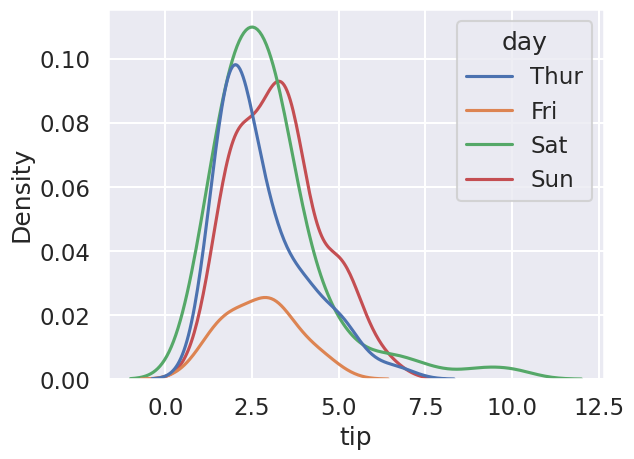

In [67]:
sns.set_context('talk')
sns.kdeplot(data=tips, x='tip', hue='day')

<Axes: xlabel='tip', ylabel='Density'>

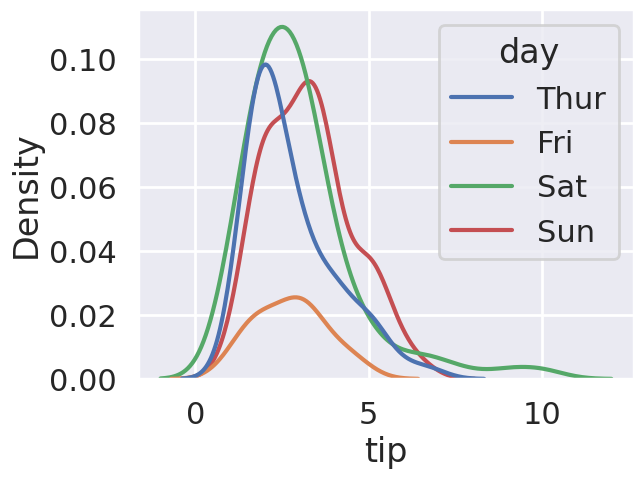

In [68]:
sns.set_context('poster')
sns.kdeplot(data=tips, x='tip', hue='day')

<Axes: xlabel='tip', ylabel='Density'>

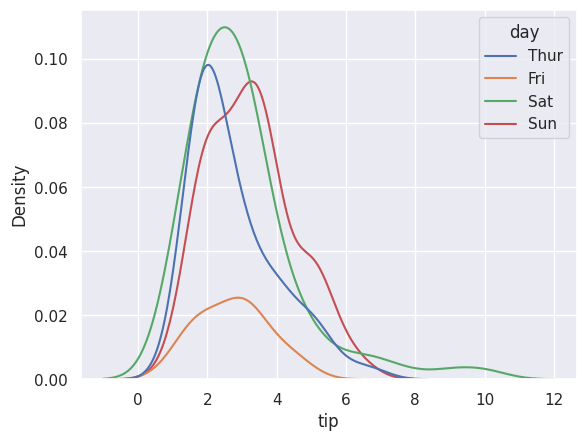

In [69]:
sns.set_context('notebook')
sns.kdeplot(data=tips, x='tip', hue='day')

### __Colors__
Seaborn allows us to choose color that we think can make the visuals attractive.

With whole range of color palettes, there are so many options to choose from.

We can either use `sns.color_palette()` before each plot, or set palette inside the plot definition.

<Axes: xlabel='tip', ylabel='Density'>

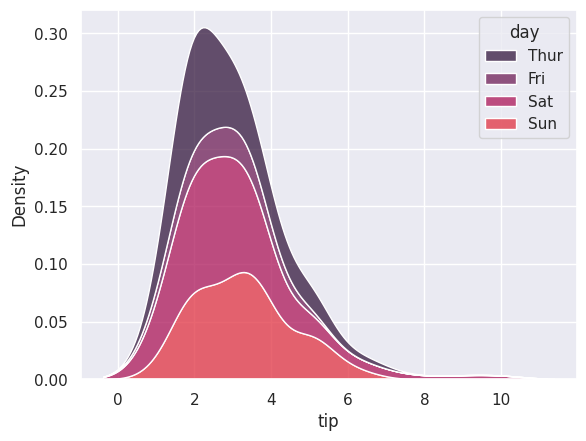

In [70]:
sns.set_palette('rocket')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

<Axes: xlabel='tip', ylabel='Density'>

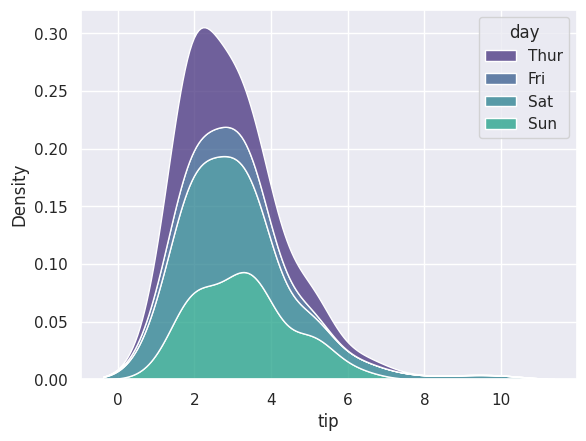

In [71]:
sns.set_palette('viridis')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

<Axes: xlabel='tip', ylabel='Density'>

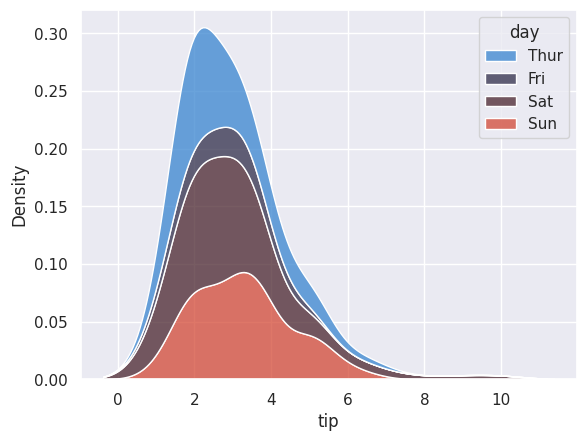

In [72]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack', palette='icefire')

As you can see, it makes the plots more appearing. There so many palettes and here is the list. You can play with them to see what color matches your purpose.

To see the available color palettes, check out the [documentation](https://seaborn.pydata.org/tutorial/color_palettes.html).

In [73]:
# To see what the palette looks like

sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [74]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

Lastly, you can use `sns.set_theme()` to directly set the style, palette, and context.

<Axes: xlabel='tip', ylabel='Density'>

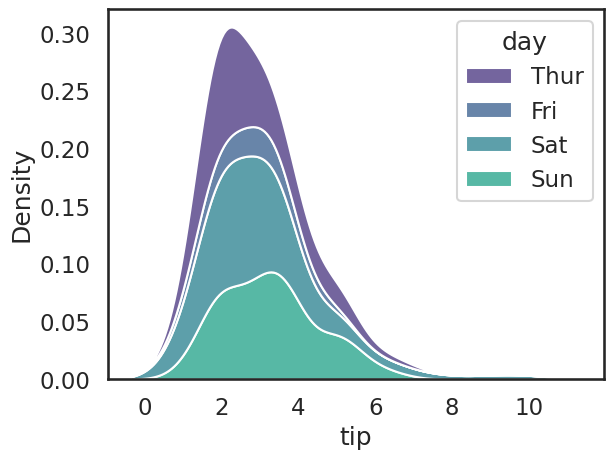

In [77]:
sns.set_theme(style='white', context='talk', palette='viridis')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')